![](https://raw.githubusercontent.com/rafneta/CienciaDatosPythonCIDE/master/imagenes/banner.png)


# Ejemplos Pandas


## Base de datos ESRU-EMOVI 2017



Por primera vez y gracias al enfoque territorial de la ESRU – EMOVI 2017, es posible medir la movilidad social por regiones. La encuesta de 2017, al igual que las anteriores, tiene como finalidad principal medir la movilidad social intergeneracional. Cuenta con 17,665 entrevistas y es representativa de hombres y mujeres entre 25 y 64 años a nivel nacional, para la Ciudad de México y cinco regiones del país: norte, norte-occidente, centro, centro-norte y sur. Los objetivos de la ESRU-EMOVI 2017 son:

- Contar con información actualizada en las distintas dimensiones de la movilidad social a nivel nacional.

- Generar estimaciones de movilidad para cinco regiones del país y la Ciudad de México.

- Analizar los patrones de movilidad social desde la perspectiva de la desigualdad de oportunidades.

Encuesta financiada por la Fundación ESRU. [CEEY](https://ceey.org.mx/contenido/que-hacemos/emovi/) 



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string

In [23]:
df = pd.read_stata('ESRU-EMOVI-2017-Entrevistado.dta',
                   convert_categoricals= False
                  )
df.dtypes

folio           object
Estado         float64
folio_ageb      object
consecutivo     object
Origen         float64
                ...   
cmo2_2          object
cmo3_2          object
cmo4_2          object
cmo5_2          object
tamhog         float64
Length: 366, dtype: object

In [25]:
df

,folio,Estado,folio_ageb,consecutivo,Origen,Latitud,Longitud,LatitudGP,LongitudGP,recontacto,...,region,cdmx,tot_int,rururb,cmo1_2,cmo2_2,cmo3_2,cmo4_2,cmo5_2,tamhog
0,0100100010286020830102,1.0,0100100010286,1,1.0,21.901323,-102.310598,21.901477,-102.310429,2,...,3.0,NaN,5.0,0.0,41,.,.,13,.,5.0
1,0100100010286020850201,1.0,0100100010286,1,2.0,21.901323,-102.310598,21.900773,-102.311138,1,...,3.0,NaN,1.0,0.0,41,.,.,41,.,1.0
2,0100100010286025830201,1.0,0100100010286,1,1.0,21.900830,-102.311818,21.900549,-102.313361,1,...,3.0,NaN,2.0,0.0,81,.,.,11,.,2.0
3,0100100010286025840101,1.0,0100100010286,1,1.0,21.901188,-102.310700,21.900765,-102.313144,1,...,3.0,NaN,1.0,0.0,52,.,.,.,.,1.0
4,0100100010286025850101,1.0,0100100010286,1,2.0,21.901188,-102.310700,21.900577,-102.312733,1,...,3.0,NaN,2.0,0.0,52,.,.,.,.,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17660,3205700010022019460402,32.0,3205700010022,2,1.0,22.755409,-102.513985,22.755409,-102.513985,1,...,2.0,NaN,4.0,0.0,71,.,.,.,71,4.0
17661,3205700010022025450501,32.0,3205700010022,2,1.0,22.288405,-101.577532,22.288405,-101.577532,1,...,2.0,NaN,4.0,0.0,.,.,.,82,71,4.0
17662,3205700010022025460301,32.0,3205700010022,2,1.0,22.758625,-102.499375,22.758625,-102.499375,1,...,2.0,NaN,6.0,0.0,.,.,.,53,52,6.0
17663,3205700010022025460302,32.0,3205700010022,2,1.0,22.755420,-102.513997,22.755420,-102.513997,1,...,2.0,NaN,5.0,0.0,.,52,.,53,62,5.0


De acuerdo a las preguntas, hacemos un filtro de acuerdo lo que necesitemos

In [28]:
# pregunta p02, comparten el mimso gasto para comer: 1 ) Si 2 ) No
df2 = df[df.p02 == 1 ]

# pregunta p08, es el jefe del hogar: 1 ) Si 
#df2 = df2[df2.p08 == 1 ]

# pregunta p12. actualmente estudia, 1)Si 2)No
df2 = df2[df2.p12 == 2 ]

# aós alacnazado podria ser importante p14

# p13, nivel escuela 1-12. 97 = no fue a la escuela
#df2 = df2[df2.p13 = 97 ] # quitamos la no asistencia
#print(df2.p13.unique())


# p63, Escuela publica o privada, 8 = No aplica 
# estonces sino aplica con quedamos con el más alto 
# esta valirvale es mas complicada, por el momento no la utiizamos
# (preguntas por cada caso)



# p68, Personas que trabajan, 1. Si, 2. No
# p69, negocio vacaciones, 1. Si, 2. No
df2 = df2[(df2.p68 == 1) | (df2.p69 == 1)] # quitamos los no ocupados


# p120, material de la casa opciones: 1,2,3

# p121, numero de cuartos para dormir, libre

# p122, numeor totales de cuartos, libre

# p123, casa propia o  del conyugue, 1. Sí, 2. No 

# p125, servicios básicos de la vivienda, 
# 125a - 125e (preguntas por cada caso, 1. Si, 2. No)

# p126, articulos propiedad del hogar 
# 126a - 126r (preguntas por cada caso, 1. Si , 2. No)

# p127, prestamo variable 1-9, 8 es otro caso
#df2 = df2[df2.p127 != 8 ] # quitamos la otra posibilidad

# p128, ahorros, tarjeta de credito, cuent abancaria, 
# a-f (preguntas por cada caso) 1. Si 2. No

# p129, pertenencias propias o de conyugue, 
# a-e (pregunta por cada caso) 1. Si, 2. No

# p130, apoyo economico porgramas u otro medio, 
# a-f, (preguntas por cada caso)  

# p131, numero de automoviles propios, libre

# p132,  numero de miembros que aportan ingreso al hogar
df2 = df2[df2.p132 == 1] # un solo sosten

# Cohort  de ingreso todas las personas que aportan ingresos
df2 = df2[(df2.p133 != 8) & ( df2.p133 != 9) ] #ingreso no reportado o no diponible

print('valores cohort de ingreso',df2.p133.unique())


# p134, condiciones del barrio
# a-i, (preguntas por cada caso) 1. Si , 2. No, 8 son respuesta 
p = "p134"


for _ in "abcdefghi":
    df2 = df2[df2[p+_] != 8]


# p147 percepción de 1 más pobre + 10 más rico
    
    
#df2.p08.plot.hist()


#df2.p133.plot.hist()

Estado = ["Estado"]
p5 = ['p05']
p6 = ['p06']
p13  = ['p13']
SINCO = ['SINCO3']
p63 = ['p63a','p63b','p63c','p63d'] # por el momento la  quitamos de la estimación
p120  = ['p120']
p121  = ['p121']
p122  = ['p122']
p123  = ['p123']
p125 = ['p125a','p125b','p125c','p125d','p125e']
import string
p126 = ['p126' + i for i in string.ascii_lowercase[0:18] ]
p127 = ['p127']
p128 = ['p128a','p128b','p128c','p128d','p128e','p128f']
p129 = ['p129a','p129b','p129c','p129d','p129e']
p130 = ['p130a','p130b','p130c','p130d','p130e', 'p130f']
p131 = ['p131']
p132 = ['p132']
p134 = ['p134a','p134b','p134c','p134d','p134e', 'p134f','p134g','p134h','p134i']
p147 = ['p147']

#indexX =  p13  +  p120  + p121 +  p122  + p123 + p125  + p126 + p127 + p128 + p129  + p130 + p131  

#indexX =  p13   + p121 +  p122 + p127 + p131 


#indexX =  p13  + p131 

indexX = Estado + p5 + p6 + p13 + SINCO


indexY = ['p133']

M  = df2[indexX+indexY].dropna() 

M.loc[M.p133 == 2,'p133'] = 1
M.loc[M.p133 != 1,'p133'] = M.p133 - 1



X = M[indexX].to_numpy()
Xc = M[indexX].astype('category')
y = M[indexY].to_numpy()
yc = M[indexY].astype('category')
y = np.ravel(y)
y = y-1;


valores cohort de ingreso [4 3 7 5 1 2 6]


In [29]:
Xc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699 entries, 6 to 17653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Estado  3699 non-null   category
 1   p05     3699 non-null   category
 2   p06     3699 non-null   category
 3   p13     3699 non-null   category
 4   SINCO3  3699 non-null   category
dtypes: category(5)
memory usage: 226.8 KB


In [31]:
Xc.describe()

,Estado,p05,p06,p13,SINCO3
count,3699.0,3699.0,3699,3699.0,3699
unique,32.0,40.0,2,13.0,305
top,9.0,40.0,1,2.0,4111
freq,600.0,146.0,2254,943.0,489


In [33]:
Xc.value_counts()

Estado  p05   p06  p13   SINCO3
7.0     25.0  2    3.0   9998      4
        62.0  1    2.0   6111      4
4.0     64.0  1    2.0   6111      3
6.0     62.0  1    2.0   7121      3
9.0     26.0  1    6.0   4211      3
                                  ..
19.0    27.0  2    11.0  1511      1
                   4.0   4111      1
                   2.0   7513      1
              1    6.0   5114      1
1.0     25.0  1    6.0   2815      1
Length: 3606, dtype: int64

In [34]:
Xc.dtypes

Estado    category
p05       category
p06       category
p13       category
SINCO3    category
dtype: object

In [37]:
Xc.p06.cat.categories

Int64Index([1, 2], dtype='int64')

In [38]:
Xc.p06.value_counts(dropna=False)

1    2254
2    1445
Name: p06, dtype: int64

In [39]:
Mc = M.astype('category')

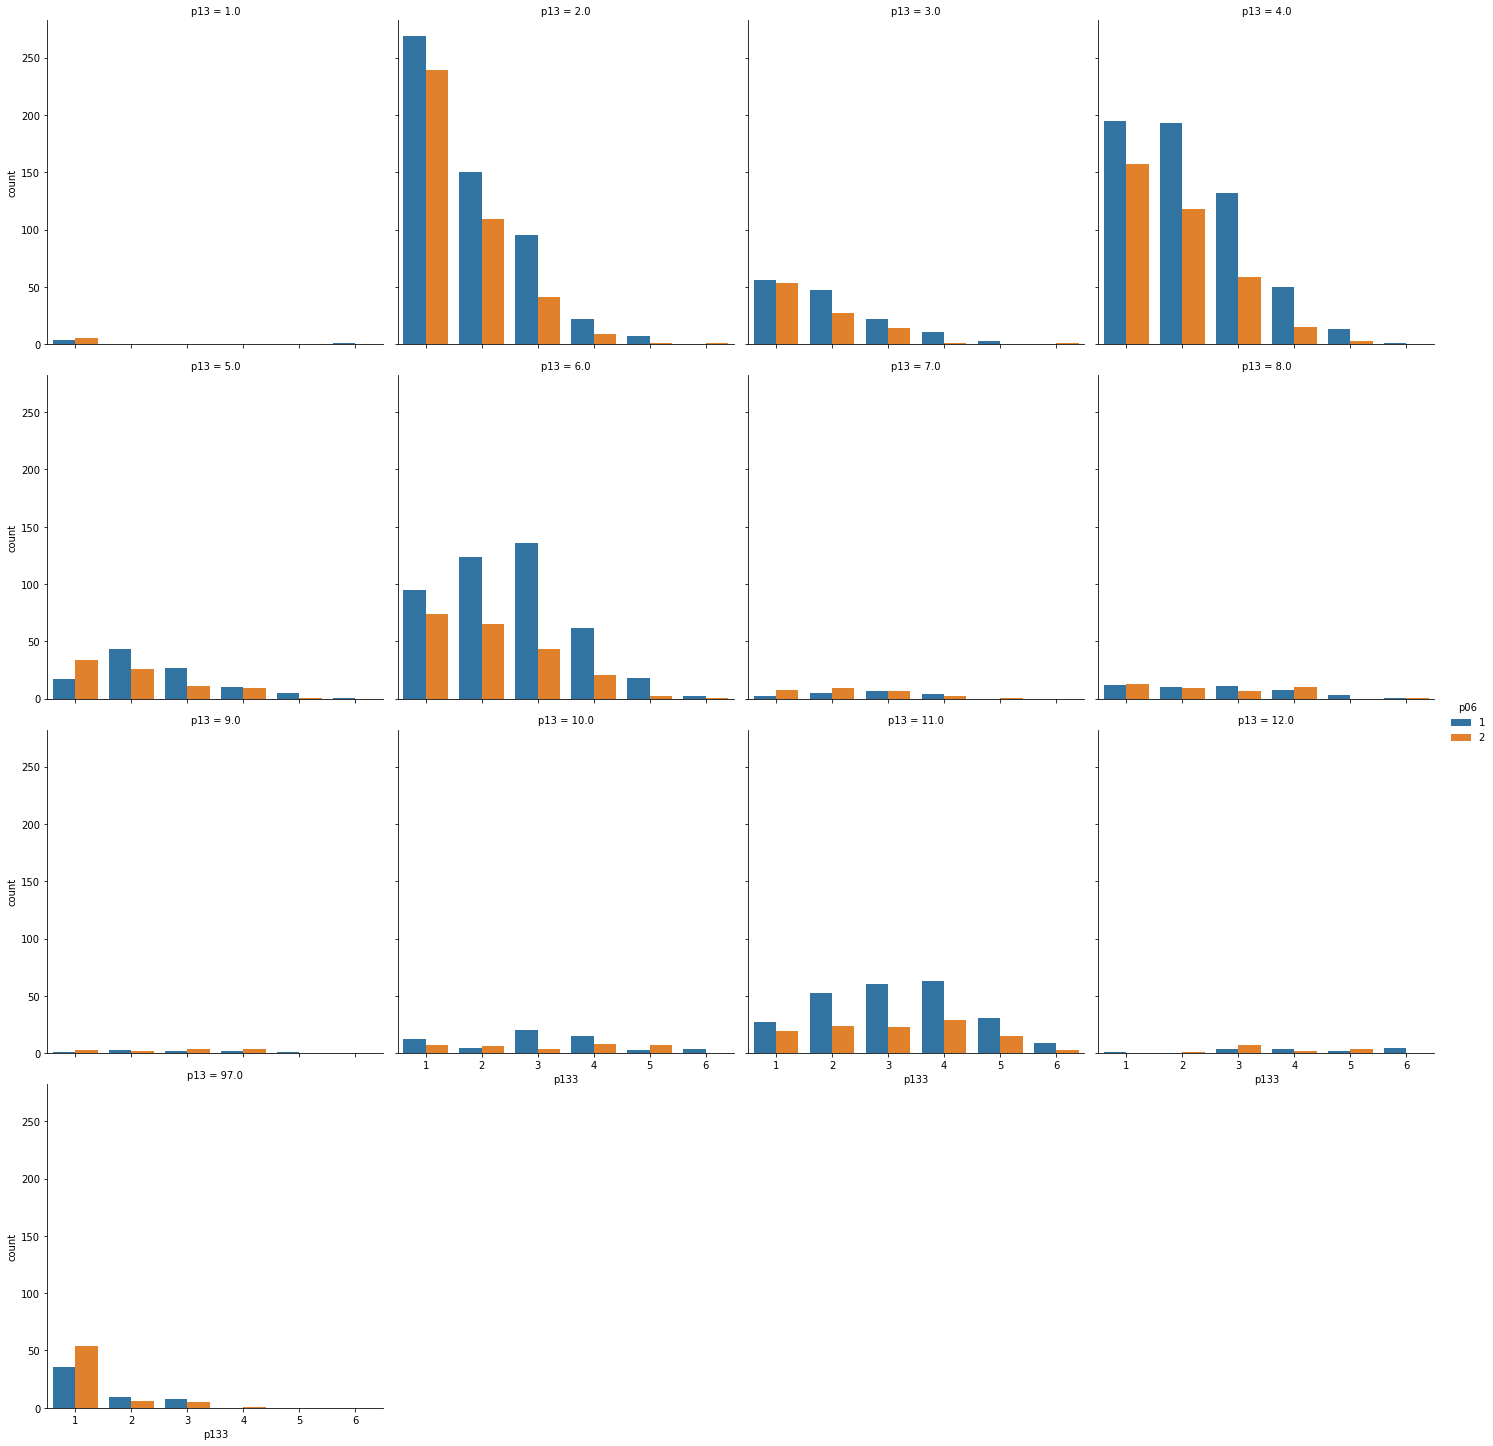

In [40]:
sns.catplot(x = "p133",
            data = Mc,
            col="p13", 
            col_wrap=4,
           kind = 'count',
           hue = 'p06')
plt.show()

## Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) 2016

La Encuesta Nacional de Ingresos y Gastos de los Hogares 2016 se llevó a cabo del 21 de agosto al 28 de noviembre de 2016. Su objetivo es proporcionar un panorama estadístico del comportamiento de los ingresos y gastos de los hogares en cuanto a su monto, procedencia y distribución; adicionalmente, ofrece información sobre las características ocupacionales y sociodemográficas de los integrantes del hogar, así como las características de la infraestructura de la vivienda y el equipamiento del hogar. [ENIGH-2016](https://www.inegi.org.mx/programas/enigh/nc/2016/)


In [5]:
url = "ingresos.dta"
df = pd.read_stata(url,
                   convert_categoricals= False
                  )
df.dtypes


folioviv     object
foliohog     object
numren       object
clave        object
mes_1        object
mes_2        object
mes_3        object
mes_4        object
mes_5        object
mes_6        object
ing_1       float64
ing_2       float64
ing_3       float64
ing_4       float64
ing_5       float64
ing_6       float64
ing_tri     float64
dtype: object

In [10]:
df

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
0,0100003801,1,02,P009,,,,,,,7500.0,NaN,NaN,NaN,NaN,NaN,1844.26
1,0100003801,1,01,P001,09,08,07,06,05,04,18000.0,18000.0,18000.0,18000.0,18000.0,18000.0,53114.75
2,0100003801,1,02,P001,09,08,07,06,05,04,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,44262.29
3,0100003801,1,01,P009,,,,,,,6000.0,NaN,NaN,NaN,NaN,NaN,1475.40
4,0100003802,1,02,P040,10,09,08,07,06,05,0.0,0.0,0.0,0.0,5000.0,0.0,2459.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334332,3260801906,1,02,P022,10,09,08,07,06,05,0.0,0.0,2200.0,2000.0,2000.0,2000.0,4010.86
334333,3260801906,1,02,P053,10,09,08,07,06,05,500.0,0.0,300.0,200.0,0.0,300.0,635.86
334334,3260801906,1,04,P014,10,09,08,07,06,05,1080.0,0.0,0.0,0.0,0.0,0.0,528.26
334335,3260801906,1,04,P001,10,09,08,07,06,05,1200.0,500.0,0.0,0.0,0.0,0.0,831.52


Creamos una función para filtar los folios de hogares y el tipo de persona deseada. ¿Qué es cada tipo de dato creado dentro de la función?

In [9]:
def familiasintegrantes(df,foliohog,numren):
    
    confolio = [ df.foliohog == _ for _ in foliohog]
    confnum = [ df.numren == _ for _ in numren]
    
    aconfolio = 0
    for c in confolio:
        aconfolio = aconfolio | c 
    
    aconfnum = 0
    for c in confnum:
        aconfnum = aconfnum | c 
    
    con = aconfolio & aconfnum
    
    return df[con]
    

In [11]:
df1 = familiasintegrantes(df,['1','2'],['01'])
df1

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
1,0100003801,1,01,P001,09,08,07,06,05,04,18000.0,18000.0,18000.0,18000.0,18000.0,18000.0,53114.75
3,0100003801,1,01,P009,,,,,,,6000.0,NaN,NaN,NaN,NaN,NaN,1475.40
8,0100003802,1,01,P001,10,09,08,07,06,05,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,47213.11
10,0100003803,1,01,P001,09,08,07,06,05,04,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,82622.95
13,0100003804,1,01,P001,09,08,07,06,05,04,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,29508.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334328,3260801904,1,01,P072,10,09,08,07,06,05,1750.0,1750.0,1750.0,1750.0,1750.0,1750.0,5135.86
334329,3260801905,1,01,P032,10,09,08,07,06,05,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,17608.69
334330,3260801905,1,01,P044,10,09,08,07,06,05,1100.0,0.0,1100.0,0.0,1100.0,0.0,1614.13
334331,3260801906,1,01,P001,10,09,08,07,06,05,2200.0,2200.0,2200.0,2000.0,2000.0,2000.0,6163.04


In [12]:
df1.foliohog.unique()

array(['1', '2'], dtype=object)

Como cada persona está repetida de acuerdo al tipo de ingresos que tiene, creamos una función para sumar los ingresos de cada persona, y una nueva variable (`ing_men`) para tener el ingreso mensual acumulado


In [16]:
def ingresosacu(df):
    df2 = df.groupby(by = ['numren','foliohog','folioviv']).sum()
    df2['claves'] = df.groupby(['numren','foliohog','folioviv'])['clave'].sum()
    df2.reset_index(level=0, inplace=True)
    df2.reset_index(level=0, inplace=True)
    df2.reset_index(level=0, inplace=True)

    df2['ing_men'] = df2.ing_tri/3
    return df2

df2 = ingresosacu(df1)
df2

,folioviv,foliohog,numren,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri,claves,ing_men
0,0100003801,1,01,24000.0,18000.0,18000.0,18000.0,18000.0,18000.0,54590.15,P001P009,18196.716667
1,0100003802,1,01,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,47213.11,P001,15737.703333
2,0100003803,1,01,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,82622.95,P001,27540.983333
3,0100003804,1,01,15000.0,10000.0,10000.0,10000.0,10000.0,10000.0,30737.69,P001P009,10245.896667
4,0100003805,1,01,40000.0,12000.0,12000.0,12000.0,12000.0,12000.0,42295.07,P001P009,14098.356667
...,...,...,...,...,...,...,...,...,...,...,...,...
67814,3260438625,2,01,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,11803.27,P001,3934.423333
67815,3260547718,2,01,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,17704.91,P001,5901.636667
67816,3260547909,2,01,1700.0,750.0,1700.0,3200.0,4150.0,3200.0,7190.21,P042P022,2396.736667
67817,3260601317,2,01,950.0,0.0,950.0,0.0,950.0,0.0,1394.02,P042,464.673333


Cremos una variable para indicar en que rango de ingreso cae cada perosona. Los rangos están predefinidos 

In [17]:
def cohorts(df):
    
    cohorts = ['C'+ c for c in '123456']
    I = [(0,2400),(2400, 4800),(4800,7200),(7200,12000),(12000,24000),(24000,np.inf)]
    #L = [(c,i) for c,i in zip(cohorts,I)]

    df3 = df.copy()
    
    def coho(ing_men,cohorts,I):
        for a in range(len(I)):
            if I[a][0] < ing_men <= I[a][1]:
                return cohorts[a]
        return 0
    
    df3['cohort']=df3['ing_men'].apply(lambda x: coho(x,cohorts,I))
    
    return df3

df3 = cohorts(df2)
df3

,folioviv,foliohog,numren,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri,claves,ing_men,cohort
0,0100003801,1,01,24000.0,18000.0,18000.0,18000.0,18000.0,18000.0,54590.15,P001P009,18196.716667,C5
1,0100003802,1,01,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,47213.11,P001,15737.703333,C5
2,0100003803,1,01,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,82622.95,P001,27540.983333,C6
3,0100003804,1,01,15000.0,10000.0,10000.0,10000.0,10000.0,10000.0,30737.69,P001P009,10245.896667,C4
4,0100003805,1,01,40000.0,12000.0,12000.0,12000.0,12000.0,12000.0,42295.07,P001P009,14098.356667,C5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67814,3260438625,2,01,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,11803.27,P001,3934.423333,C2
67815,3260547718,2,01,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,17704.91,P001,5901.636667,C3
67816,3260547909,2,01,1700.0,750.0,1700.0,3200.0,4150.0,3200.0,7190.21,P042P022,2396.736667,C1
67817,3260601317,2,01,950.0,0.0,950.0,0.0,950.0,0.0,1394.02,P042,464.673333,C1


Visualizamos cuantas personas caen en cada cohort de ingreso

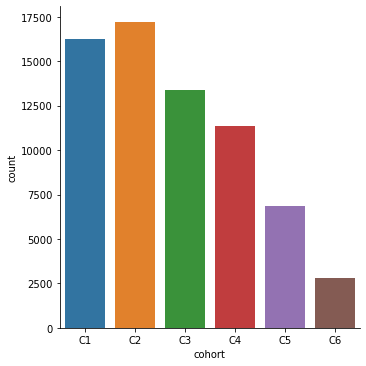

In [22]:
def histogramacohort(df):
    
    # hacemos a la variables cohort categorica ordenada
    
    df.cohort= pd.Categorical(df.cohort, 
                      categories=['C'+ c for c in '123456'],
                      ordered=True)
    
    
    sns.catplot(x = "cohort",
            data = df,
            kind = 'count')
    plt.show()

histogramacohort(df3)